<a href="https://colab.research.google.com/github/arya1406/detect-rock-paper-scissors/blob/master/detect-rock-paper-scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# untuk menginstall library loss plot 
!pip install livelossplot

In [ ]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import livelossplot
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from IPython.display import SVG


Using TensorFlow backend.


In [ ]:
# mengambil data set dari tautan
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2020-05-14 02:48:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.20MB/s    in 54s     

2020-05-14 02:49:40 (5.71 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# mengekstraksi file data yang berbentuk zip
import zipfile,os,shutil,random
import numpy as np

zip_data = '/tmp/rockpaperscissors.zip'
zip_ext = zipfile.ZipFile(zip_data, 'r')
zip_ext.extractall('/tmp')
zip_ext.close()
 
# menghapus fle yang tidak digunakan
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')
os.remove('/tmp/rockpaperscissors/README_rpc-cv-images.txt')

# inisiasi besar jumlah valid data dan test data
valid_ratio = 0.2
test_ratio = 0.05


# membagi data  menjadi train set dan validation set 
root_dir = '/tmp/rockpaperscissors'
class_dir = ['/scissors', '/rock', '/paper']

for clss in class_dir:
  os.makedirs(root_dir + '/train' + clss)
  os.makedirs(root_dir + '/valid' + clss)

for clss in class_dir:
  src_dir = root_dir + clss
  all_file = os.listdir(src_dir)
  np.random.shuffle(all_file)
  train_file, valid_file, test_file = np.split(np.array(all_file),
                                               [int(len(all_file) * (1 - valid_ratio)),
                                                int(len(all_file) * (1 - test_ratio))])

  train_file = [src_dir + '/' + name for name in train_file.tolist()]
  valid_file = [src_dir + '/' + name for name in valid_file.tolist()]
  test_file = [src_dir + '/' + name for name in test_file.tolist()]

  # melihat total jumlah data pada training set dan valid set
  print('Total Images',clss,' : ', len(all_file))
  print('training ',clss,' : ', len(train_file))
  print('validasi ',clss,' : ', len(valid_file))

  # menyalin gambar yang sudah di tetapkan ke setiap direktori
  for name in train_file:
    shutil.copy(name, root_dir + '/train' + clss)

  for name in valid_file:
    shutil.copy(name, root_dir + '/valid' + clss)

data_train_dir = '/tmp/rockpaperscissors/train'
data_valid_dir = '/tmp/rockpaperscissors/valid'

print('pembagian selesai')

Total Images /scissors  :  750
training  /scissors  :  600
validasi  /scissors  :  112
Total Images /rock  :  726
training  /rock  :  580
validasi  /rock  :  109
Total Images /paper  :  712
training  /paper  :  569
validasi  /paper  :  107
pembagian selesai


In [ ]:
# inisiasi image data generator

datagen_train = ImageDataGenerator(rescale=1./255,
                                   rotation_range=25,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.3,
                                   fill_mode='nearest')

datagen_test = ImageDataGenerator(rescale=1./255,
                                   rotation_range=25,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.3,
                                   fill_mode='nearest')

In [ ]:
# Augmentasi gambar pada setiap data

generator_train = datagen_train.flow_from_directory(data_train_dir,
                                                    target_size=(100, 100),
                                                   color_mode='rgb',
                                                   #classes=['scissors','rock','paper'],
                                                   class_mode='categorical',
                                                   batch_size=128,
                                                   )

generator_valid = datagen_test.flow_from_directory(data_valid_dir,
                                                   target_size=(100, 100),
                                                   color_mode='rgb',
                                                   #classes=['scissors','rock','paper'],
                                                   class_mode='categorical',
                                                   batch_size=128,
                                                   )

Found 1749 images belonging to 3 classes.
Found 328 images belonging to 3 classes.


In [ ]:
# membuat model Neural Network
model = models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# inisiasi plot loss
plot_losses = livelossplot.PlotLossesKeras()

In [ ]:
# melatih Neural Network
model.fit(generator_train,
          epochs=10,
          verbose=1,
          validation_data=generator_valid)

Epoch 1/10
14/14 [==============================] - 44s 3s/step - loss: 1.2018 - accuracy: 0.3762 - val_loss: 1.0677 - val_accuracy: 0.3323
Epoch 2/10
14/14 [==============================] - 38s 3s/step - loss: 1.0918 - accuracy: 0.4540 - val_loss: 1.0047 - val_accuracy: 0.5915
Epoch 3/10
14/14 [==============================] - 38s 3s/step - loss: 0.8563 - accuracy: 0.6518 - val_loss: 0.6962 - val_accuracy: 0.7957
Epoch 4/10
14/14 [==============================] - 38s 3s/step - loss: 0.6674 - accuracy: 0.7650 - val_loss: 0.7465 - val_accuracy: 0.6890
Epoch 5/10
14/14 [==============================] - 38s 3s/step - loss: 0.4885 - accuracy: 0.8027 - val_loss: 0.5640 - val_accuracy: 0.7835
Epoch 6/10
14/14 [==============================] - 38s 3s/step - loss: 0.4161 - accuracy: 0.8502 - val_loss: 0.4911 - val_accuracy: 0.8598
Epoch 7/10
14/14 [==============================] - 38s 3s/step - loss: 0.3414 - accuracy: 0.8662 - val_loss: 0.4508 - val_accuracy: 0.8780
Epoch 8/10
14/14 [==

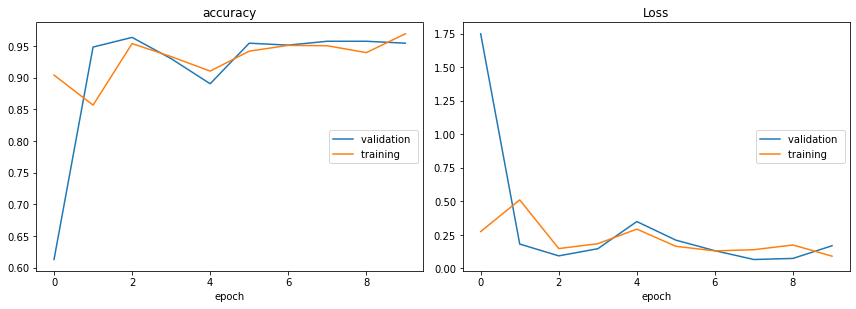

accuracy
	validation       	 (min:    0.613, max:    0.963, cur:    0.954)
	training         	 (min:    0.856, max:    0.969, cur:    0.969)
Loss
	validation       	 (min:    0.066, max:    1.748, cur:    0.169)
	training         	 (min:    0.091, max:    0.511, cur:    0.091)


In [ ]:
model.fit(generator_train,
          epochs=10,
          verbose=1,
          callbacks=[plot_losses],
          validation_data=generator_valid)

In [ ]:
# untuk melihat layer, output masing masing layer, dan parameter masing masing layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

Saving 2l1K148aIJHRR1q7.png to 2l1K148aIJHRR1q7.png
This is Scissors!


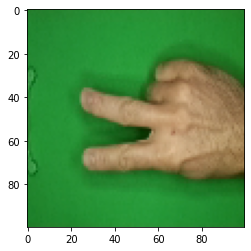

In [ ]:
# cells ini berfungsi untuk menguji model neural network 
# dengan memasukkan gambar baru pada widget yang muncul

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
upload = files.upload()
 
for fn in upload.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  
  if classes[0,0]==1:
    print('This is Paper!')
  if classes[0,1]==1:
    print('This is Rock!')
  if classes[0,2]==1:
    print('This is Scissors!')
